In [33]:
import pandas as pd

In [34]:
data=pd.read_csv(f"SaYoPillow.csv")
data.head()
data.shape
data.isnull().any()
data.columns=['snoring_rate', 'respiration_rate', 'body_temperature', 'limb_movement', 'blood_oxygen', \
             'eye_movement', 'sleeping_hours', 'heart_rate', 'stress_level']


In [35]:
data.drop('snoring_rate', inplace=True, axis=1)
data.drop('limb_movement', inplace=True, axis=1)
data.drop('eye_movement', inplace=True, axis=1)
data.drop('body_temperature', inplace=True, axis=1)
data.head()

,respiration_rate,blood_oxygen,sleeping_hours,heart_rate,stress_level
0,25.680,89.840,1.840,74.20,3
1,25.104,89.552,1.552,72.76,3
2,20.000,95.000,7.000,60.00,1
3,23.536,88.768,0.768,68.84,3
4,17.248,96.248,8.248,53.12,0


In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(data.iloc[:, :8], data['stress_level'], \
                                                  test_size=0.2, random_state=8)
X_train.drop('stress_level', inplace=True, axis=1)
X_test.drop('stress_level', inplace=True, axis=1)
print(X_train.shape, X_test.shape)
print(X_train[:5])

(504, 4) (126, 4)
     respiration_rate  blood_oxygen  sleeping_hours  heart_rate
303            25.136        89.568           1.568       72.84
186            16.816        95.816           7.816       52.04
12             17.440        96.440           8.440       53.60
8              16.112        95.112           7.112       50.28
543            29.296        86.944           0.000       83.24


In [37]:
from tensorflow.keras.utils import to_categorical

num_classes=5
y_train=to_categorical(y_train, num_classes)
y_test=to_categorical(y_test, num_classes)
y_train[:5]

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model=Sequential()
model.add(Dense(125, activation="relu"))
model.add(Dense(125, activation="relu"))
model.add(Dense(5, "softmax"))

In [39]:
epochs=50
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
stats=model.fit(X_train, y_train, epochs=epochs, validation_split=0.2)

Epoch 1/50
13/13 [==============================] - 0s 11ms/step - loss: 4.8828 - accuracy: 0.2308 - val_loss: 1.7619 - val_accuracy: 0.3366
Epoch 2/50
13/13 [==============================] - 0s 3ms/step - loss: 1.3507 - accuracy: 0.5409 - val_loss: 1.1001 - val_accuracy: 0.3762
Epoch 3/50
13/13 [==============================] - 0s 3ms/step - loss: 0.8359 - accuracy: 0.6923 - val_loss: 0.7093 - val_accuracy: 0.8119
Epoch 4/50
13/13 [==============================] - 0s 3ms/step - loss: 0.5961 - accuracy: 0.9305 - val_loss: 0.6830 - val_accuracy: 0.7426
Epoch 5/50
13/13 [==============================] - 0s 3ms/step - loss: 0.5579 - accuracy: 0.9206 - val_loss: 0.5097 - val_accuracy: 1.0000
Epoch 6/50
13/13 [==============================] - 0s 3ms/step - loss: 0.4759 - accuracy: 0.9752 - val_loss: 0.5188 - val_accuracy: 0.7426
Epoch 7/50
13/13 [==============================] - 0s 2ms/step - loss: 0.4430 - accuracy: 0.8809 - val_loss: 0.4932 - val_accuracy: 0.7426
Epoch 8/50
13/13 [=

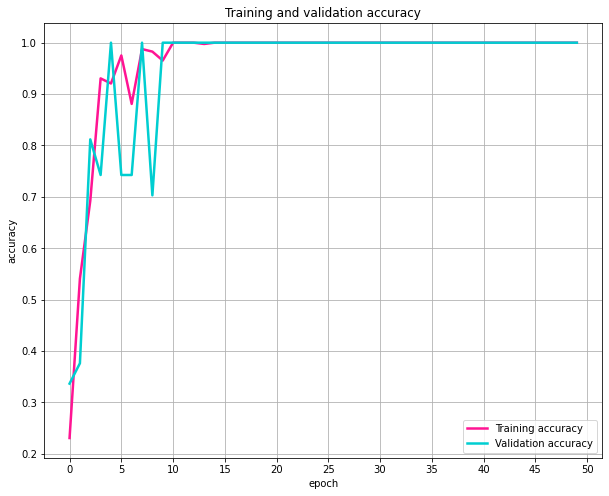

In [40]:
import matplotlib.pyplot as plot
import seaborn as sb

stats_df=pd.DataFrame(stats.history)
stats_df['epoch']=list(range(epochs))
plot.figure(figsize=(10, 8))
sb.lineplot(y='accuracy', x='epoch', data=stats_df, color='deeppink', linewidth=2.5, label="Training accuracy")
sb.lineplot(y='val_accuracy', x='epoch', data=stats_df, color='darkturquoise', linewidth=2.5, \
            label="Validation accuracy")
plot.grid()
plot.legend()
plot.title("Training and validation accuracy")
plot.xticks(range(0, 51, 5));

In [41]:
_, accuracy=model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 1ms/step - loss: 0.0154 - accuracy: 1.0000


In [42]:
import os
checkpoint_path = "stress_classifier"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model
model.save(checkpoint_path)


INFO:tensorflow:Assets written to: stress_classifier\assets
